In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-muted')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [22]:
df_run_t_big = pd.read_csv('output_server/hd/runtimes_big_24_3P.csv',index_col=0)
df_run_t_small = pd.read_csv('output_server/hd/runtimes_small_24_3P.csv',index_col=0)

df_inf_t_small = pd.read_csv('output_server/hd/inf_times_day_small_24_3P.csv',index_col=0)
df_inf_t_big = pd.read_csv('output_server/hd/inf_times_day_big_24_3P.csv',index_col=0)

df_run_t24 = pd.read_csv('output_server/runtimes_big_new_n_48_dT_24_dur_96.csv',index_col=0)
df_run_t1 = pd.read_csv('output_server/runtimes_big_new_n_48_dT_1_dur_96.csv',index_col=0)
df_run_t1_old = pd.read_csv('output_server/runtimes_big_old_n_48_dT_1_dur_96.csv',index_col=0)
df_inf_t24 = pd.read_csv('output_server/inf_times_day_big_new_n_48_dT_24_dur_96.csv',index_col=0)
df_inf_t1 = pd.read_csv('output_server/inf_times_day_big_new_n_48_dT_1_dur_96.csv',index_col=0)
df_inf_t1_old = pd.read_csv('output_server/inf_times_day_big_old_n_48_dT_1_dur_96.csv',index_col=0)


Text(0.5, 1.0, 'big_24_3P_96')

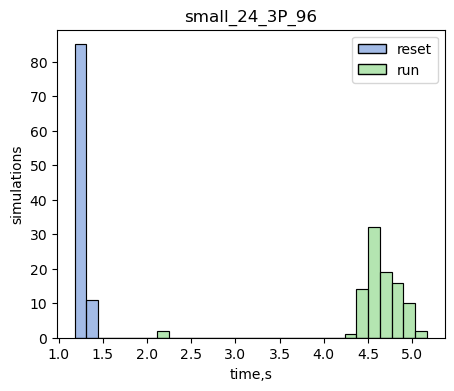

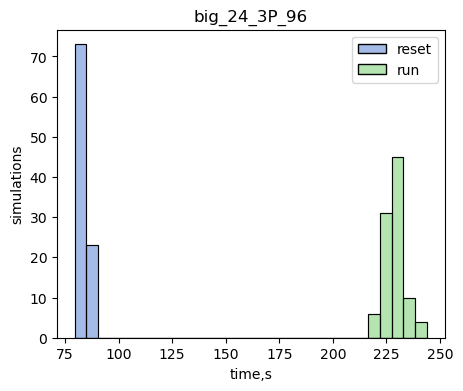

In [5]:
#df_run_t_big.transpose().hist()

fig, ax = plt.subplots(1,1, figsize=(5,4))
data_name = 'small_24_3P_96'
sns.histplot(data=df_run_t_small.transpose(),bins=30, ax=ax)
ax.set_xlabel('time,s')
ax.set_ylabel('simulations')
ax.set_title(data_name)

fig, ax = plt.subplots(1,1, figsize=(5,4))
data_name = 'big_24_3P_96'
sns.histplot(data=df_run_t_big.transpose(),bins=30, ax=ax)
ax.set_xlabel('time,s')
ax.set_ylabel('simulations')
ax.set_title(data_name)


Text(0, 0.5, 'infection events')

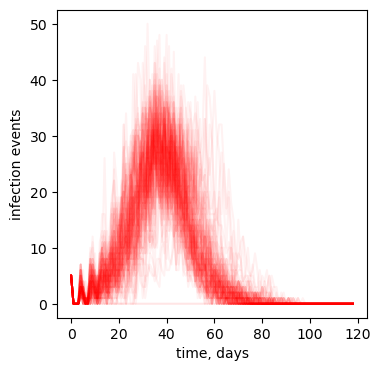

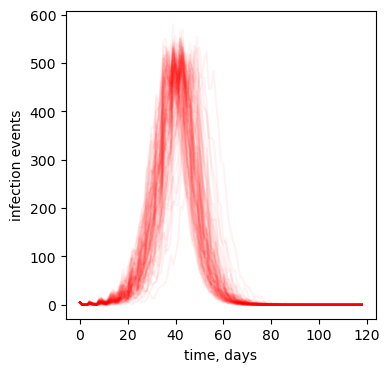

In [6]:
#df_inf_t_small.hist()
#sns.histplot(df_inf_t_small, fill=False)
fig, ax = plt.subplots(1,1,figsize=(4,4))
for col in df_inf_t_small.columns:
    y,x = np.histogram(df_inf_t_small[col][~pd.isna(df_inf_t_small[col])],bins=np.arange(0,120,1))
    ax.plot(x[:-1],y,'r',alpha=0.05)
    
ax.set_xlabel('time, days')
ax.set_ylabel('infection events')

fig, ax = plt.subplots(1,1,figsize=(4,4))
for col in df_inf_t_big.columns:
    y,x = np.histogram(df_inf_t_big[col][~pd.isna(df_inf_t_big[col])],bins=np.arange(0,120,1))
    ax.plot(x[:-1],y,'r',alpha=0.05)
    
ax.set_xlabel('time, days')
ax.set_ylabel('infection events')



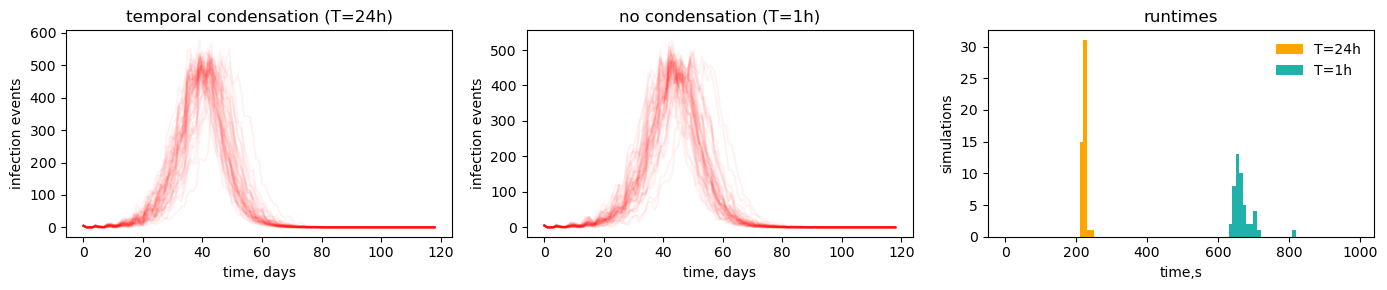

In [56]:
#df_inf_t_small.hist()
#sns.histplot(df_inf_t_small, fill=False)
fig, axes = plt.subplots(1,3,figsize=(14,3))
ax0,ax1,ax2 = axes#[0]
for col in df_inf_t24.columns:
    y,x = np.histogram(df_inf_t24[col][~pd.isna(df_inf_t24[col])],bins=np.arange(0,120,1))
    ax0.plot(x[:-1],y,'r',alpha=0.05)
ax0.set_title('temporal condensation (T=24h)') 
ax0.set_xlabel('time, days')
ax0.set_ylabel('infection events')

for col in df_inf_t1.columns:
    y,x = np.histogram(df_inf_t1[col][~pd.isna(df_inf_t1[col])],bins=np.arange(0,120,1))
    ax1.plot(x[:-1],y,'r',alpha=0.05)
ax1.set_title('no condensation (T=1h)')       
ax1.set_xlabel('time, days')
ax1.set_ylabel('infection events')


# for col in df_inf_t1_old.columns:
#     y,x = np.histogram(df_inf_t1_old[col][~pd.isna(df_inf_t1_old[col])],bins=np.arange(0,120,1))
#     ax2.plot(x[:-1],y,'r',alpha=0.05)
# ax2.set_title('old')    
# ax2.set_xlabel('time, days')
# ax2.set_ylabel('infection events')

data_name = 'small_24_3P_96'
#sns.histplot(data=df_run_t24.transpose(),bins=30, ax=ax)
df_run_t24.transpose()['run'].hist(ax=ax2, bins=np.arange(0,1000,10),grid=False, label='T=24h', color='orange')
df_run_t1.transpose()['run'].hist(ax=ax2, bins=np.arange(0,1000,10),grid=False, label='T=1h', color='lightseagreen')
ax2.set_xlabel('time,s')
ax2.set_ylabel('simulations')
ax2.set_title('runtimes')
ax2.legend(frameon=False)
plt.tight_layout()
fig.savefig('plots/temp_cond_comparison.png', dpi=300, bbox_inches='tight')

<Axes: >

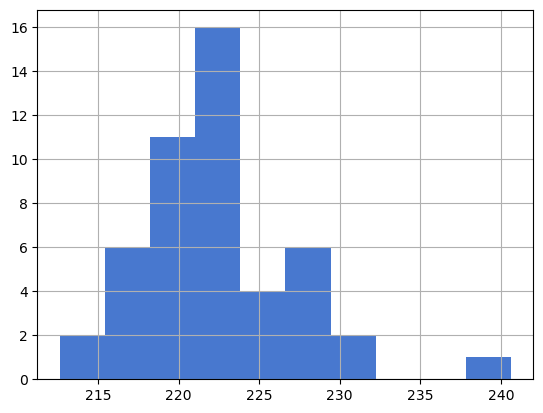

In [37]:
df_run_t24.transpose()['run'].hist(ax=ax2)

In [12]:

#np.histogram(df_inf_t_small.values)
data = df_inf_t_small[~pd.isna(df_inf_t_small)].values
~pd.isna(df_inf_t_small)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,False,True,True,False,False,True,True,...,True,True,True,False,True,False,True,True,True,True
3,True,True,True,True,True,True,True,False,True,True,...,False,True,True,True,True,True,True,True,True,True
4,False,True,True,False,True,False,True,True,False,True,...,False,False,False,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,True,True,True,True,True,False,True,True,False,True,...,True,True,True,False,True,True,True,True,True,False
1055,False,False,True,False,True,True,False,False,True,False,...,True,True,False,True,True,False,True,False,True,True
1056,True,True,True,True,True,True,True,True,False,False,...,True,True,True,False,False,True,True,True,True,True
1057,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Text(0.5, 1.0, 'small_24_3P_96')

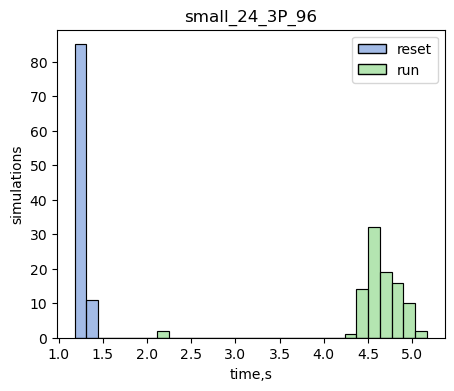

In [13]:
#df_run_t_small.transpose().hist()

fig, ax = plt.subplots(1,1, figsize=(5,4))
data_name = 'small_24_3P_96'
sns.histplot(data=df_run_t_small.transpose(),bins=30, ax=ax)
ax.set_xlabel('time,s')
ax.set_ylabel('simulations')
ax.set_title(data_name)